In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from statsmodels.tsa.vector_ar.var_model import VAR

In [2]:
# 2.Load Dataset
data = pd.read_csv("hanoi_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,76,1,15,36,7,7
1,3/2/2019,117,64,4,28,3,5
2,3/3/2019,10,64,1,22,16,5
3,3/4/2019,118,56,13,22,14,6
4,3/5/2019,2,34,15,21,6,6
...,...,...,...,...,...,...,...
1915,5/28/2024,85,56,14,1,8,6
1916,5/29/2024,58,50,13,1,8,6
1917,5/30/2024,47,39,10,1,8,8
1918,5/31/2024,48,63,10,1,8,8


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1920 non-null   object
 1   pm25    1920 non-null   int64 
 2   pm10    1920 non-null   int64 
 3   o3      1920 non-null   int64 
 4   no2     1920 non-null   int64 
 5   so2     1920 non-null   int64 
 6   co      1920 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,63.091667,39.147917,16.548958,19.444271,11.690104,7.580208
std,40.260213,21.942295,16.580522,10.014321,6.428450,2.986652
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,22.000000,8.000000,13.000000,7.000000,5.000000
50%,54.500000,36.000000,14.000000,19.000000,11.000000,7.000000
75%,88.000000,54.000000,21.000000,27.000000,17.000000,9.000000
max,217.000000,121.000000,441.000000,53.000000,43.000000,21.000000


In [4]:
#Chọn thuộc tính
data = data[['pm25','pm10']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25,pm10
0,76,1
1,117,64
2,10,64
3,118,56
4,2,34
...,...,...
1915,85,56
1916,58,50
1917,47,39
1918,48,63


In [5]:
def smoothed(data):
    # Apply moving average filter to smooth the forecasted values
    window_size = 5  # You can adjust the window size as needed
    forecast_smoothed = data.rolling(window=window_size).mean()

    # Interpolate NaN values resulting from the moving average
    forecast_smoothed_interpolated = forecast_smoothed.interpolate()

    # Fill remaining NaN values
    forecast_smoothed_filled = forecast_smoothed_interpolated.fillna(method='bfill')  # or 'ffill', or use fillna(value=0)
    
    return forecast_smoothed_filled

# Example usage
data = smoothed(data)

<Axes: >

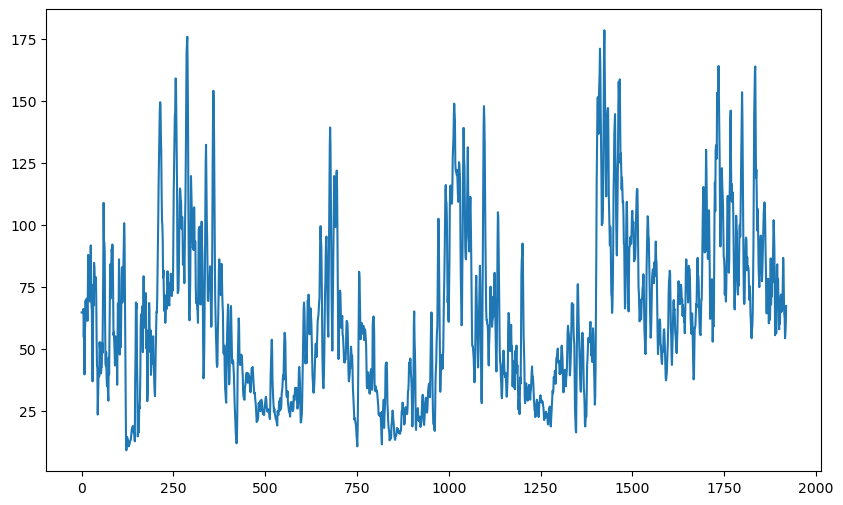

In [6]:
data['pm25'].plot(figsize=(10,6))

In [7]:
# Split the data into training, testing
train_size = int(0.9 * len(data))
test_size = int(0.1 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1728
Test data size: 192


In [8]:
# 3. Quá trình Training
model = VAR(train_data)
model_fitted = model.fit(maxlags =15 , ic='aic')

In [9]:
# 4. Quá trình testing 
# Dự đoán cho cả 'pm25' và 'pm10'
y_pred = model_fitted.forecast(train_data.values[-model_fitted.k_ar:], steps=len(test_data))


In [10]:
y_pred

array([[131.80184038,  72.77515098],
       [121.0829157 ,  68.69741185],
       [112.34164561,  69.63533651],
       [120.13474786,  62.50033933],
       [103.39527194,  58.73400109],
       [ 92.42285409,  55.62388268],
       [ 89.68472552,  55.30559246],
       [ 88.15565723,  54.63103687],
       [ 84.53450136,  54.29829274],
       [ 85.71000122,  52.87593612],
       [ 88.17088398,  53.56621614],
       [ 87.88951265,  53.60817791],
       [ 88.87370643,  52.18342968],
       [ 87.13054438,  52.43296389],
       [ 87.85438928,  53.49663124],
       [ 87.49808739,  54.156228  ],
       [ 89.04602029,  54.07775314],
       [ 89.02494686,  55.16549307],
       [ 90.47229812,  55.60006297],
       [ 90.29826608,  56.15867143],
       [ 90.74494949,  55.84716491],
       [ 89.98431252,  56.05066054],
       [ 89.25431895,  55.49193692],
       [ 88.45163951,  54.89006662],
       [ 87.70012787,  53.68023448],
       [ 86.38927872,  52.94048976],
       [ 85.04587528,  52.06710042],
 

In [11]:
y_pred = pd.DataFrame(y_pred, columns=['pm25', 'pm10'])
y_pred = smoothed(y_pred)
y_pred = y_pred.to_numpy()

In [12]:
y_pred

array([[117.7512843 ,  66.46844795],
       [117.7512843 ,  66.46844795],
       [117.7512843 ,  66.46844795],
       [117.7512843 ,  66.46844795],
       [117.7512843 ,  66.46844795],
       [109.87548704,  63.03819429],
       [103.595849  ,  60.35983042],
       [ 98.75865133,  57.35897049],
       [ 91.63860203,  55.71856117],
       [ 88.10154788,  54.54694818],
       [ 87.25115386,  54.13541487],
       [ 86.89211129,  53.79593196],
       [ 87.03572113,  53.30641052],
       [ 87.55492973,  52.93334475],
       [ 87.98380734,  53.05748377],
       [ 87.84924803,  53.17548615],
       [ 88.08054955,  53.26940119],
       [ 88.11079764,  53.86581387],
       [ 88.77914839,  54.49923368],
       [ 89.26792375,  55.03164172],
       [ 89.91729617,  55.36982911],
       [ 90.10495461,  55.76441059],
       [ 90.15082903,  55.82969936],
       [ 89.74669731,  55.68770009],
       [ 89.22706967,  55.19201269],
       [ 88.35593551,  54.61067766],
       [ 87.36824807,  53.81396564],
 

In [13]:

# 5. Quá trình tạo index predict 90 ngày tiếp theo
last_index = data.index[-1]

# # Dự đoán cho 90 ngày tiếp theo
y_next_90_days = model_fitted.forecast(data.values[-model_fitted.k_ar:], steps=90)



# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)



Predicted closing prices for the next 90 days:
[[66.47585316 53.34132141]
 [68.48909471 51.61941542]
 [68.40170667 52.45685018]
 [69.94592796 50.831143  ]
 [67.22069498 49.49027496]
 [67.11497761 48.85925114]
 [67.04057004 48.68803641]
 [66.88302577 47.81266401]
 [65.74649613 47.72322533]
 [65.2552443  48.78101987]
 [66.00943008 49.48985055]
 [66.18501007 49.87747432]
 [66.79557361 49.43136765]
 [66.60144934 49.10394869]
 [66.83012321 47.99577593]
 [65.65914122 47.01316511]
 [65.01262474 46.02910158]
 [63.85765213 45.78244328]
 [63.67799314 45.49082537]
 [63.55543763 45.41661968]
 [64.01917974 45.27620138]
 [64.20921808 45.26402507]
 [64.63621888 45.19595666]
 [64.87377166 45.13321409]
 [64.87686583 45.11373471]
 [64.82680871 45.07955966]
 [64.75949937 45.0224603 ]
 [64.76177453 44.78427769]
 [64.52919467 44.53250526]
 [64.39807299 44.22202078]
 [64.15663789 44.0025806 ]
 [64.06286105 43.76550944]
 [63.85551165 43.6226066 ]
 [63.8314158  43.46916267]
 [63.78904921 43.32925929]
 [63.810

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính RMSE
rmse = np.sqrt(mean_squared_error(test_data['pm25'], y_pred[:, 0]))
print('Testing RMSE:', rmse)

# Tính MAE
mae = mean_absolute_error(test_data['pm25'], y_pred[:, 0])
print('\nTesting MAE:', mae)

# Tính MAPE
mape = np.mean(np.abs((test_data['pm25'] - y_pred[:, 0]) / test_data['pm25'])) * 100
print('\nTesting MAPE:', mape)


Testing RMSE: 28.470208204646823

Testing MAE: 20.806955120551724

Testing MAPE: 19.85665591940289


In [15]:
test_data.index

RangeIndex(start=1728, stop=1920, step=1)

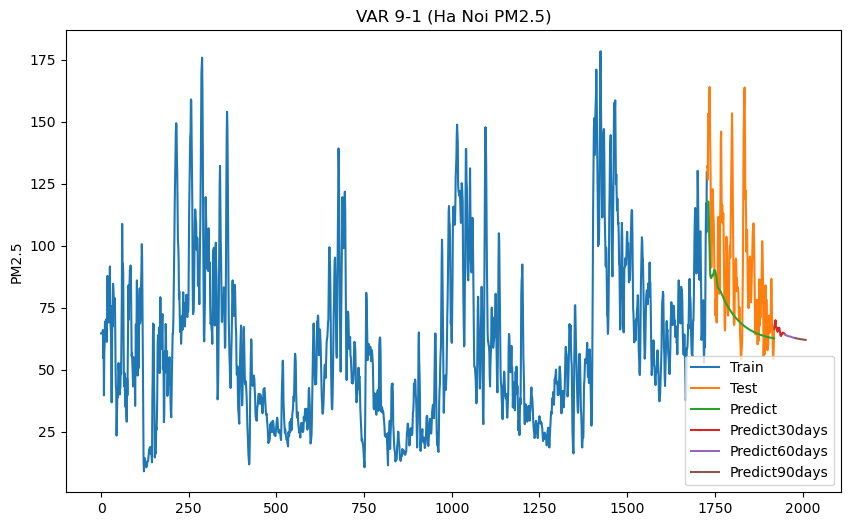

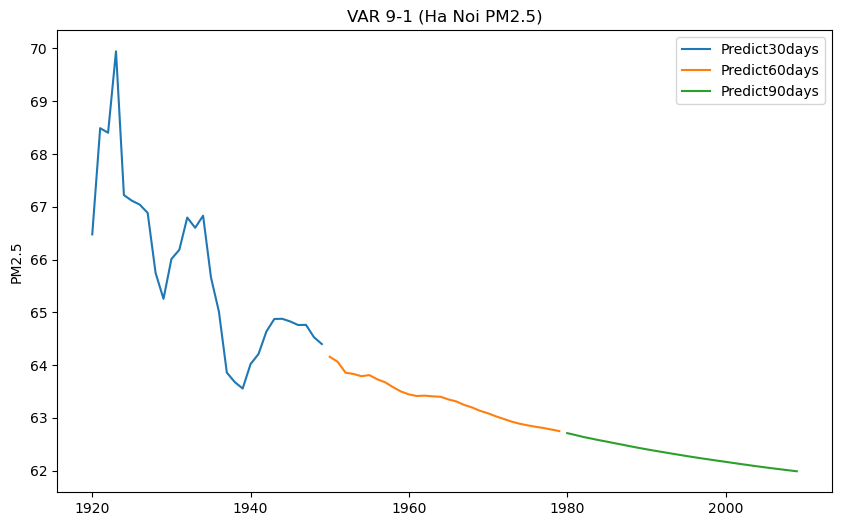

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử last_index và y_next_90_days đã được định nghĩa trước đó
# Bạn có thể thay thế chúng bằng dữ liệu thực tế của mình

# Vẽ biểu đồ huấn luyện và kiểm tra với dự đoán
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['pm25'], label='Train')
plt.plot(test_data.index, test_data['pm25'], label='Test')
plt.plot(test_data.index, y_pred[:, 0], label='Predict')

# Vẽ dự đoán 90 ngày
last_index = data.index[-1]  # Giả sử last_index là index cuối cùng của train_data

last_data = pd.RangeIndex(start=last_index + 1, stop=last_index + 31, step=1)
plt.plot(last_data, y_next_90_days[0:30][:, 0], label='Predict30days')

last_data = pd.RangeIndex(start=last_index + 31, stop=last_index + 61, step=1)
plt.plot(last_data, y_next_90_days[30:60][:, 0], label='Predict60days')

last_data = pd.RangeIndex(start=last_index + 61, stop=last_index + 91, step=1)
plt.plot(last_data, y_next_90_days[60:90][:, 0], label='Predict90days')

plt.legend()
plt.title('VAR 9-1 (Ha Noi PM2.5)')
plt.ylabel('PM2.5')
plt.show()

# Vẽ dự đoán 90 ngày với kích thước 14x7
plt.figure(figsize=(10, 6))
last_data = pd.RangeIndex(start=last_index + 1, stop=last_index + 31, step=1)
plt.plot(last_data, y_next_90_days[0:30][:, 0], label='Predict30days')

last_data = pd.RangeIndex(start=last_index + 31, stop=last_index + 61, step=1)
plt.plot(last_data, y_next_90_days[30:60][:, 0], label='Predict60days')

last_data = pd.RangeIndex(start=last_index + 61, stop=last_index + 91, step=1)
plt.plot(last_data, y_next_90_days[60:90][:, 0], label='Predict90days')

plt.legend()
plt.title('VAR 9-1 (Ha Noi PM2.5)')
plt.ylabel('PM2.5')
plt.show()
